In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Harmonic sums

In what follows, $p$ will always denote a prime number.

$$
\sum_k^n \frac{1}{k} \sim \log(n)
$$

$$
\sum_{p\leq n} \frac{1}{p} \sim \log\log(n)
$$

In [3]:
n = int(1e3)

nn = np.linspace(1, n, n)
log_nn = np.log(nn)
harmonic_sum = np.cumsum(1 / nn)

def is_prime(n: int):
    if n < 2:
        return False
    n_sqrt = int(np.ceil(np.sqrt(n)))
    for k in range(2, n_sqrt + 1):
        if n % k == 0:
            return False
    return True

pp_mask = np.array([i for i, n in enumerate(nn) if is_prime(n)])
harmonic_prime_sum = []
p = 2.0
s = 0.5
for k in nn[1:]:
    if is_prime(k):
        p = k
        s += 1 / p
    harmonic_prime_sum.append(s)
harmonic_prime_sum = np.array(harmonic_prime_sum)
loglog_nn = np.log(log_nn[1:])

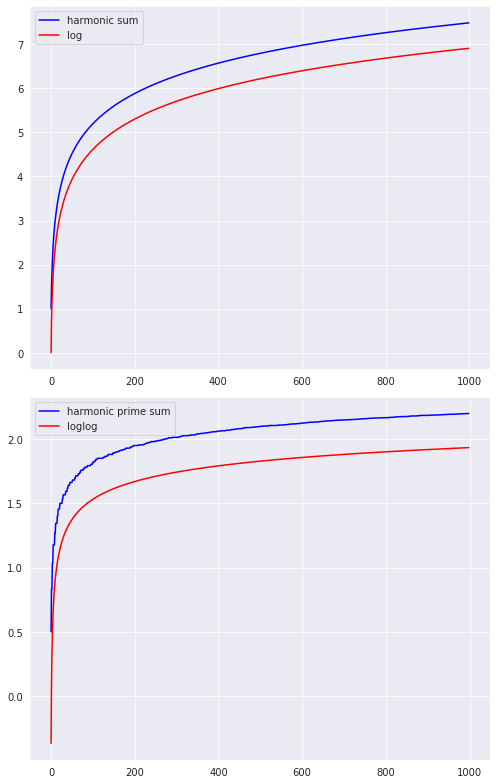

In [4]:
with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(figsize=(7, 11), nrows=2, ncols=1)

    ax = axes[0]
    ax.plot(harmonic_sum, color='blue', label='harmonic sum')
    ax.plot(log_nn, color='red', label='log')
    ax.legend(loc='upper left')
    
    ax = axes[1]
    ax.plot(harmonic_prime_sum, color='blue', label='harmonic prime sum')
    ax.plot(loglog_nn, color='red', label='loglog')
    ax.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()